# Etivity 2 - Data Preparation
<br>Student Name: Seamus O'Flaherty 
<br>Student ID: 14233069

Using the *bank* dataset i will perform data preparation techniques on it to allow me to do the following:
  - encode all categorical data as numerical
  - fill in or deal with all missing values
  - apply a scaler to rescale values
  - treat outliers appropraitely
  - creat at least one new feature from existing data

### Import required modules and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


### Create scale mappers for month and education

In [2]:
scale_mapper_mon = {
    "jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11
}

df['month'] = df['month'].replace(scale_mapper_mon)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


In [3]:
scale_mapper_edu = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df['education'] = df['education'].replace(scale_mapper_edu)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


### Dealing with pdays column
This column has *-1* value where there hasnt been a previous contact. I will replace this value with a *0*. 

In [4]:
df['pdays'].replace({-1: 0},inplace=True)

In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,0,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,8,1334,2,0,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,8,231,1,0,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,8,185,1,0,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,8,208,2,0,0,NaN,yes


### Check for missing data

In [6]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

# A - Filling in missing data

### Education
<br>Fill in missing education data using median value.

In [7]:
df['education'].fillna(df['education'].median(), inplace=True)

In [8]:
df.isna().sum()

age            12
job            10
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Missing education values have now been filled in

## Jobs

Jobs has 10 missing values or 0.5% overall. As jobs is a very hard value to predict in this dataset and is such a small percentage overall i will drop the rows that are missing job data and store the output in a new dataframe.

In [9]:
df2=df.dropna(subset=['job'])
df2.isna().sum()

age            12
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact       190
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      451
subscribed      0
dtype: int64

In [10]:
df2.count()

age           1978
job           1990
marital       1990
education     1990
default       1990
balance       1990
housing       1990
loan          1990
contact       1800
day           1990
month         1990
duration      1990
campaign      1990
pdays         1990
previous      1990
poutcome      1539
subscribed    1990
dtype: int64

Now we can see that these rows have been removed successfully.

## Age

To get missing values for age i am going to get the median age grouped by education and job and use this value to fill in the missing values.

In [11]:
dfage=df2.groupby(['job','education'])['age'].median().reset_index()

In [12]:
dfage

,job,education,age
0,admin.,1.0,48.5
1,admin.,2.0,40.0
2,admin.,3.0,33.0
3,blue-collar,1.0,42.5
4,blue-collar,2.0,37.0
5,blue-collar,3.0,29.0
6,entrepreneur,1.0,55.0
7,entrepreneur,2.0,40.0
8,entrepreneur,3.0,43.5
9,housemaid,1.0,50.5


Merge the medians to the dataframe as an extra column

In [13]:
dfnew = pd.merge(df2,dfage,  how='left', on=['job','education'],copy='False')

In [14]:
dfnew

,age_x,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_y
0,32.0,technician,single,3.0,no,392,yes,no,cellular,1,3,957,2,131,2,failure,no,35.0
1,39.0,technician,divorced,2.0,no,688,yes,yes,cellular,1,3,233,2,133,1,failure,no,39.0
2,59.0,retired,married,2.0,no,1035,yes,yes,cellular,1,3,126,2,239,1,failure,no,64.0
3,47.0,blue-collar,married,2.0,no,398,yes,yes,cellular,1,3,274,1,238,2,failure,no,37.0
4,54.0,retired,married,2.0,no,1004,yes,no,cellular,1,3,479,1,307,1,failure,no,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,20.0,student,single,2.0,no,2785,no,no,cellular,16,8,327,2,0,0,NaN,yes,25.0
1986,28.0,admin.,single,2.0,no,127,no,no,cellular,16,8,1334,2,0,0,NaN,yes,40.0
1987,81.0,retired,married,1.0,no,1154,no,no,telephone,17,8,231,1,0,0,NaN,yes,70.0
1988,46.0,services,married,1.0,no,4343,yes,no,NaN,20,8,185,1,0,0,NaN,yes,47.0


Take all existing values for age and merge the medians in for the missing values thus filling in all values for age (All Nan's will be replaced by the computed median)

In [15]:
dfmergedages = dfnew['age_x'].fillna(dfnew['age_y'])

In [16]:
dfmergedages

0       32.0
1       39.0
2       59.0
3       47.0
4       54.0
        ... 
1985    20.0
1986    28.0
1987    81.0
1988    46.0
1989    40.0
Name: age_x, Length: 1990, dtype: float64

Add the column back to dataframe

In [17]:
dfagefilled= pd.concat([dfnew, dfmergedages.rename("age_filled")], axis=1)

Here we can see that the median values have replaced missing values and the original values are kept.

In [18]:
dfagefilled[590:605]

,age_x,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_y,age_filled
590,33.0,management,divorced,3.0,no,893,yes,no,cellular,29,0,259,1,259,9,failure,no,37.0,33.0
591,50.0,management,single,3.0,no,567,yes,no,cellular,29,0,50,1,258,8,failure,no,37.0,50.0
592,46.0,entrepreneur,married,2.0,no,294,yes,no,cellular,29,0,444,1,196,1,failure,no,40.0,46.0
593,NaN,management,married,3.0,no,1857,no,no,cellular,29,0,386,1,168,4,failure,no,37.0,37.0
594,30.0,management,single,3.0,no,1422,yes,yes,cellular,29,0,305,1,223,27,failure,no,37.0,30.0
595,NaN,self-employed,married,2.0,yes,254,yes,yes,cellular,29,0,194,1,188,1,failure,no,43.0,43.0
596,39.0,management,divorced,3.0,no,547,yes,no,cellular,29,0,317,2,260,4,failure,no,37.0,39.0
597,51.0,management,single,3.0,no,0,yes,no,telephone,29,0,121,1,244,2,failure,no,37.0,51.0
598,41.0,admin.,single,2.0,no,1322,yes,no,cellular,29,0,58,1,266,1,failure,no,40.0,41.0
599,NaN,admin.,single,2.0,no,111,yes,no,cellular,29,0,55,1,195,3,failure,no,40.0,40.0


In [19]:
#Drop the old age columns(age_x and age_y)
df_eduagejob = dfagefilled.drop(['age_x', 'age_y'], axis=1)

In [20]:
df_eduagejob.isna().sum()

job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact       190
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      451
subscribed      0
age_filled      0
dtype: int64

## Remaining missing values
<br>Now the only missing values we have left to deal with are contact and poutcome. From examining the data we know that the missing values in poutcome correspond to where a previous contact/campaign hasnt been tried therefore they are neither success or failure. I will replace these missing values with a value 'None'. I will one hot encode Contact as it categorical.  

In [21]:
dft = df_eduagejob
dft['poutcome'].fillna('none', inplace=True)
dft

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_filled
0,technician,single,3.0,no,392,yes,no,cellular,1,3,957,2,131,2,failure,no,32.0
1,technician,divorced,2.0,no,688,yes,yes,cellular,1,3,233,2,133,1,failure,no,39.0
2,retired,married,2.0,no,1035,yes,yes,cellular,1,3,126,2,239,1,failure,no,59.0
3,blue-collar,married,2.0,no,398,yes,yes,cellular,1,3,274,1,238,2,failure,no,47.0
4,retired,married,2.0,no,1004,yes,no,cellular,1,3,479,1,307,1,failure,no,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,student,single,2.0,no,2785,no,no,cellular,16,8,327,2,0,0,none,yes,20.0
1986,admin.,single,2.0,no,127,no,no,cellular,16,8,1334,2,0,0,none,yes,28.0
1987,retired,married,1.0,no,1154,no,no,telephone,17,8,231,1,0,0,none,yes,81.0
1988,services,married,1.0,no,4343,yes,no,NaN,20,8,185,1,0,0,none,yes,46.0


In [22]:
#one-hot encode the categorical column contact that has NaNs

dftt = pd.get_dummies(dft, columns=['contact'], 
                        dummy_na=True)
dftt.tail()

,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_filled,contact_cellular,contact_telephone,contact_nan
1985,student,single,2.0,no,2785,no,no,16,8,327,2,0,0,none,yes,20.0,1,0,0
1986,admin.,single,2.0,no,127,no,no,16,8,1334,2,0,0,none,yes,28.0,1,0,0
1987,retired,married,1.0,no,1154,no,no,17,8,231,1,0,0,none,yes,81.0,0,1,0
1988,services,married,1.0,no,4343,yes,no,20,8,185,1,0,0,none,yes,46.0,0,0,1
1989,entrepreneur,married,2.0,no,6403,no,no,22,8,208,2,0,0,none,yes,40.0,1,0,0


In [23]:
dftt.isna().sum()

job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
subscribed           0
age_filled           0
contact_cellular     0
contact_telephone    0
contact_nan          0
dtype: int64

Now we can see that we have no missing values.

In [24]:
#one-hot encode the job and poutcome columns 

dftt = pd.get_dummies(dftt, columns=['job','poutcome'])
dftt.tail()

,marital,education,default,balance,housing,loan,day,month,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_none,poutcome_other,poutcome_success
1985,single,2.0,no,2785,no,no,16,8,327,2,...,0,0,0,1,0,0,0,1,0,0
1986,single,2.0,no,127,no,no,16,8,1334,2,...,0,0,0,0,0,0,0,1,0,0
1987,married,1.0,no,1154,no,no,17,8,231,1,...,1,0,0,0,0,0,0,1,0,0
1988,married,1.0,no,4343,yes,no,20,8,185,1,...,0,0,1,0,0,0,0,1,0,0
1989,married,2.0,no,6403,no,no,22,8,208,2,...,0,0,0,0,0,0,0,1,0,0


In [25]:
#one-hot encode the remaining categorical columns

dftt = pd.get_dummies(dftt, drop_first=True)
dftt.head()

,education,balance,day,month,duration,campaign,pdays,previous,age_filled,contact_cellular,...,poutcome_failure,poutcome_none,poutcome_other,poutcome_success,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,3.0,392,1,3,957,2,131,2,32.0,1,...,1,0,0,0,0,1,0,1,0,0
1,2.0,688,1,3,233,2,133,1,39.0,1,...,1,0,0,0,0,0,0,1,1,0
2,2.0,1035,1,3,126,2,239,1,59.0,1,...,1,0,0,0,1,0,0,1,1,0
3,2.0,398,1,3,274,1,238,2,47.0,1,...,1,0,0,0,1,0,0,1,1,0
4,2.0,1004,1,3,479,1,307,1,54.0,1,...,1,0,0,0,1,0,0,1,0,0


# B - Rescaling Features

In [26]:
robust_scaler = RobustScaler()
dftt[['balance','duration','pdays']] = robust_scaler.fit_transform(dftt[['balance','duration','pdays']])

In [27]:
standard_scaler = StandardScaler()
dftt[['previous','campaign']] = standard_scaler.fit_transform(dftt[['previous','campaign']])


In [28]:
dftt['education'] = dftt['education']/2
dftt['day'] = (dftt['day']-1)/30
dftt['month'] = dftt['month']/11


In [29]:
dftt.head()

,education,balance,day,month,duration,campaign,pdays,previous,age_filled,contact_cellular,...,poutcome_failure,poutcome_none,poutcome_other,poutcome_success,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,1.5,-0.109351,0.0,0.272727,3.138194,0.063692,-0.291845,-0.165736,32.0,1,...,1,0,0,0,0,1,0,1,0,0
1,1.0,0.096814,0.0,0.272727,-0.013058,0.063692,-0.280401,-0.459427,39.0,1,...,1,0,0,0,0,0,0,1,1,0
2,1.0,0.338499,0.0,0.272727,-0.478781,0.063692,0.326180,-0.459427,59.0,1,...,1,0,0,0,1,0,0,1,1,0
3,1.0,-0.105172,0.0,0.272727,0.165397,-0.660577,0.320458,-0.165736,47.0,1,...,1,0,0,0,1,0,0,1,1,0
4,1.0,0.316908,0.0,0.272727,1.057671,-0.660577,0.715308,-0.459427,54.0,1,...,1,0,0,0,1,0,0,1,0,0


In [30]:
dftt['day']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1985    0.500000
1986    0.500000
1987    0.533333
1988    0.633333
1989    0.700000
Name: day, Length: 1990, dtype: float64

# C - Treating Outliers
In the previous step(etivity1) we identified balance as having outliers.

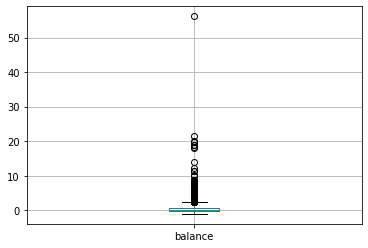

In [31]:
dftt.boxplot(column=['balance'])
plt.show()

Here we can clearly see that balance has an outlier value but as this value is quite possible i will keep the value but do a log transformation on this column. First lets look at a histogram of the rescaled value.

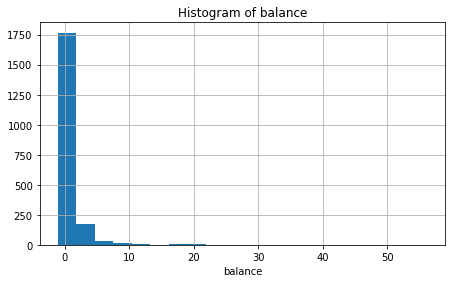

In [32]:
# Create histogram of balance
fig = plt.figure(figsize=(16,9))
hg = fig.add_subplot(2, 2, 1)
hg.set_title("Histogram of balance")
hg.set_xlabel('balance')
dftt['balance'].hist(bins=20)

We can see that the histogram is skewed to the left which isnt ideal. Now i check the minimum value of this column.

In [33]:
dftt[['balance']].min()

balance   -1.064949
dtype: float64

As these extreme values are possible (someone may have a very high balance) i want to diminish the negative impact of the outliers on the model. To do this I will apply a log transformation but as I have a negative value in the column after rescaling, I will add a constant to all values in order to shift them to a positive range before applying a log transformation.

In [34]:
# Use a log transformation to decrease the impact of outliers
dftt['balance'] = np.log(dftt['balance']+2.07)

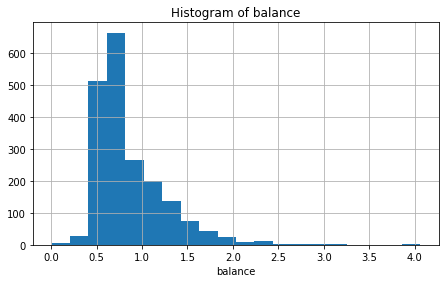

In [35]:
# Create histogram of balance
fig = plt.figure(figsize=(16,9))
hg = fig.add_subplot(2, 2, 1)
hg.set_title("Histogram of balance")
hg.set_xlabel('balance')
dftt['balance'].hist(bins=20)

The new histogram show that the transformed features are less skewed and have distributions closer to normal than the original feature *balance*

# D - Creation of Derived Features
I will create a feature *has_loan* that indicates if a customer has an existing loan of any sort (housing or personal). This will allow an easy check if someone has a loan.

In [36]:
df=dftt

In [37]:
df=dftt
df.loc[((df['housing_yes'] == 1) 
       |(df['loan_yes'] == 1)), 'has_loan'] = 1

df['has_loan'] = df['has_loan'].fillna(0)

In [38]:
df[['has_loan','housing_yes','loan_yes']]

,has_loan,housing_yes,loan_yes
0,1.0,1,0
1,1.0,1,1
2,1.0,1,1
3,1.0,1,1
4,1.0,1,0
...,...,...,...
1985,0.0,0,0
1986,0.0,0,0
1987,0.0,0,0
1988,1.0,1,0


In [39]:
#dft['has_previous'] = np.where(df_eduagejob['previous']>0, 'yes', 'no')

# E - Housekeeping - tidy up data before exporting to csv

Convert floats to int for feature column - *has_loan*

In [40]:
df['has_loan'] = df['has_loan'].astype(int)

In [41]:
df['has_loan']

0       1
1       1
2       1
3       1
4       1
       ..
1985    0
1986    0
1987    0
1988    1
1989    0
Name: has_loan, Length: 1990, dtype: int64

In [42]:
#Export to csv file
df.to_csv('bank_preprocessed.csv',index = False)

# F - Conclusion
The final preprocessed dataset has 34 columns and 1990 rows with no missing data. I have encoded all categorical data as numerical, applied a scaler, treated outliers and created a feature from the existing data. The dataset has been exported to  .csv file.